In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import re
from collections import Counter
from sklearn.feature_selection import SelectKBest, f_classif


<h1><strong>Dataset 1</strong></h1>

EDA Plan
- Get info about dataset
- Fix types, and values
- Check for outliers and faulty information
- Graph data

In [1108]:
df1 = pd.read_csv("./Datasets/train.csv")
pd.set_option('display.max_columns', None)
df1.head()

/var/folders/0k/lh9_4p7n4pl5ctlys4rv5fdh0000gn/T/ipykernel_81494/3477205706.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("./Datasets/train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [1109]:
df1.shape

(100000, 28)

In [1110]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [1111]:
df1.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [1112]:
# Number of null values
numberOfNullVals = df1.isnull().sum().sum()
numberOfNullVals

60071

In [1113]:
df1.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [1114]:
# Duplicated rows
df1.duplicated().value_counts()

False    100000
Name: count, dtype: int64

In [1115]:
# Are all IDs unique?
if len(df1["ID"].unique()) == df1.shape[0]:
    print("All IDs are unique")
else:
    print("All IDs aren't unique")

All IDs are unique


In [1116]:
# Are all Customer_IDs unique?
if len(df1["Customer_ID"].unique()) == df1.shape[0]:
    print("All Customer_IDs are unique")
else:
    print("All Customer_IDs aren't unique")


All Customer_IDs aren't unique


In [1117]:
# Unique Customer_IDs
uniqueCustomerIDs = df1["Customer_ID"].unique()
print(f'Unique Customer IDs: {len(uniqueCustomerIDs)}')

Unique Customer IDs: 12500


In [1118]:
def formatColumn(columnName,type):
    
    if type == "int":
        regexPattern = "[^0-9]"
    elif type == "float":
        regexPattern = "[^0-9.]"
        
    if df1[columnName].dtype != "float64" and df1[columnName].dtype != "int64":   
        df1[columnName] = df1[columnName].str.replace(regexPattern, '', regex=True)
        df1[columnName] = pd.to_numeric(df1[columnName], errors='coerce')
    
    df1[columnName] = df1[columnName].astype(float)

In [1119]:
def setCategoryFunc(columnName):
    df1[columnName] = df1[columnName].astype('category')

In [1120]:
integerColumns = ["Age","Num_of_Loan","Num_of_Delayed_Payment"]
floatColumns = ["Annual_Income","Outstanding_Debt","Monthly_Balance","Amount_invested_monthly","Changed_Credit_Limit"]
categoryColumns = ["Month","Occupation","Type_of_Loan","Credit_Mix","Payment_of_Min_Amount","Payment_Behaviour","Credit_Score"]

for column in integerColumns:
    formatColumn(column,"int")
    
for column in floatColumns:
    formatColumn(column,"float")
    
for column in categoryColumns:
    setCategoryFunc(column)

In [1121]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        100000 non-null  object  
 1   Customer_ID               100000 non-null  object  
 2   Month                     100000 non-null  category
 3   Name                      90015 non-null   object  
 4   Age                       100000 non-null  float64 
 5   SSN                       100000 non-null  object  
 6   Occupation                100000 non-null  category
 7   Annual_Income             100000 non-null  float64 
 8   Monthly_Inhand_Salary     84998 non-null   float64 
 9   Num_Bank_Accounts         100000 non-null  int64   
 10  Num_Credit_Card           100000 non-null  int64   
 11  Interest_Rate             100000 non-null  int64   
 12  Num_of_Loan               100000 non-null  float64 
 13  Type_of_Loan              8859

<Axes: >

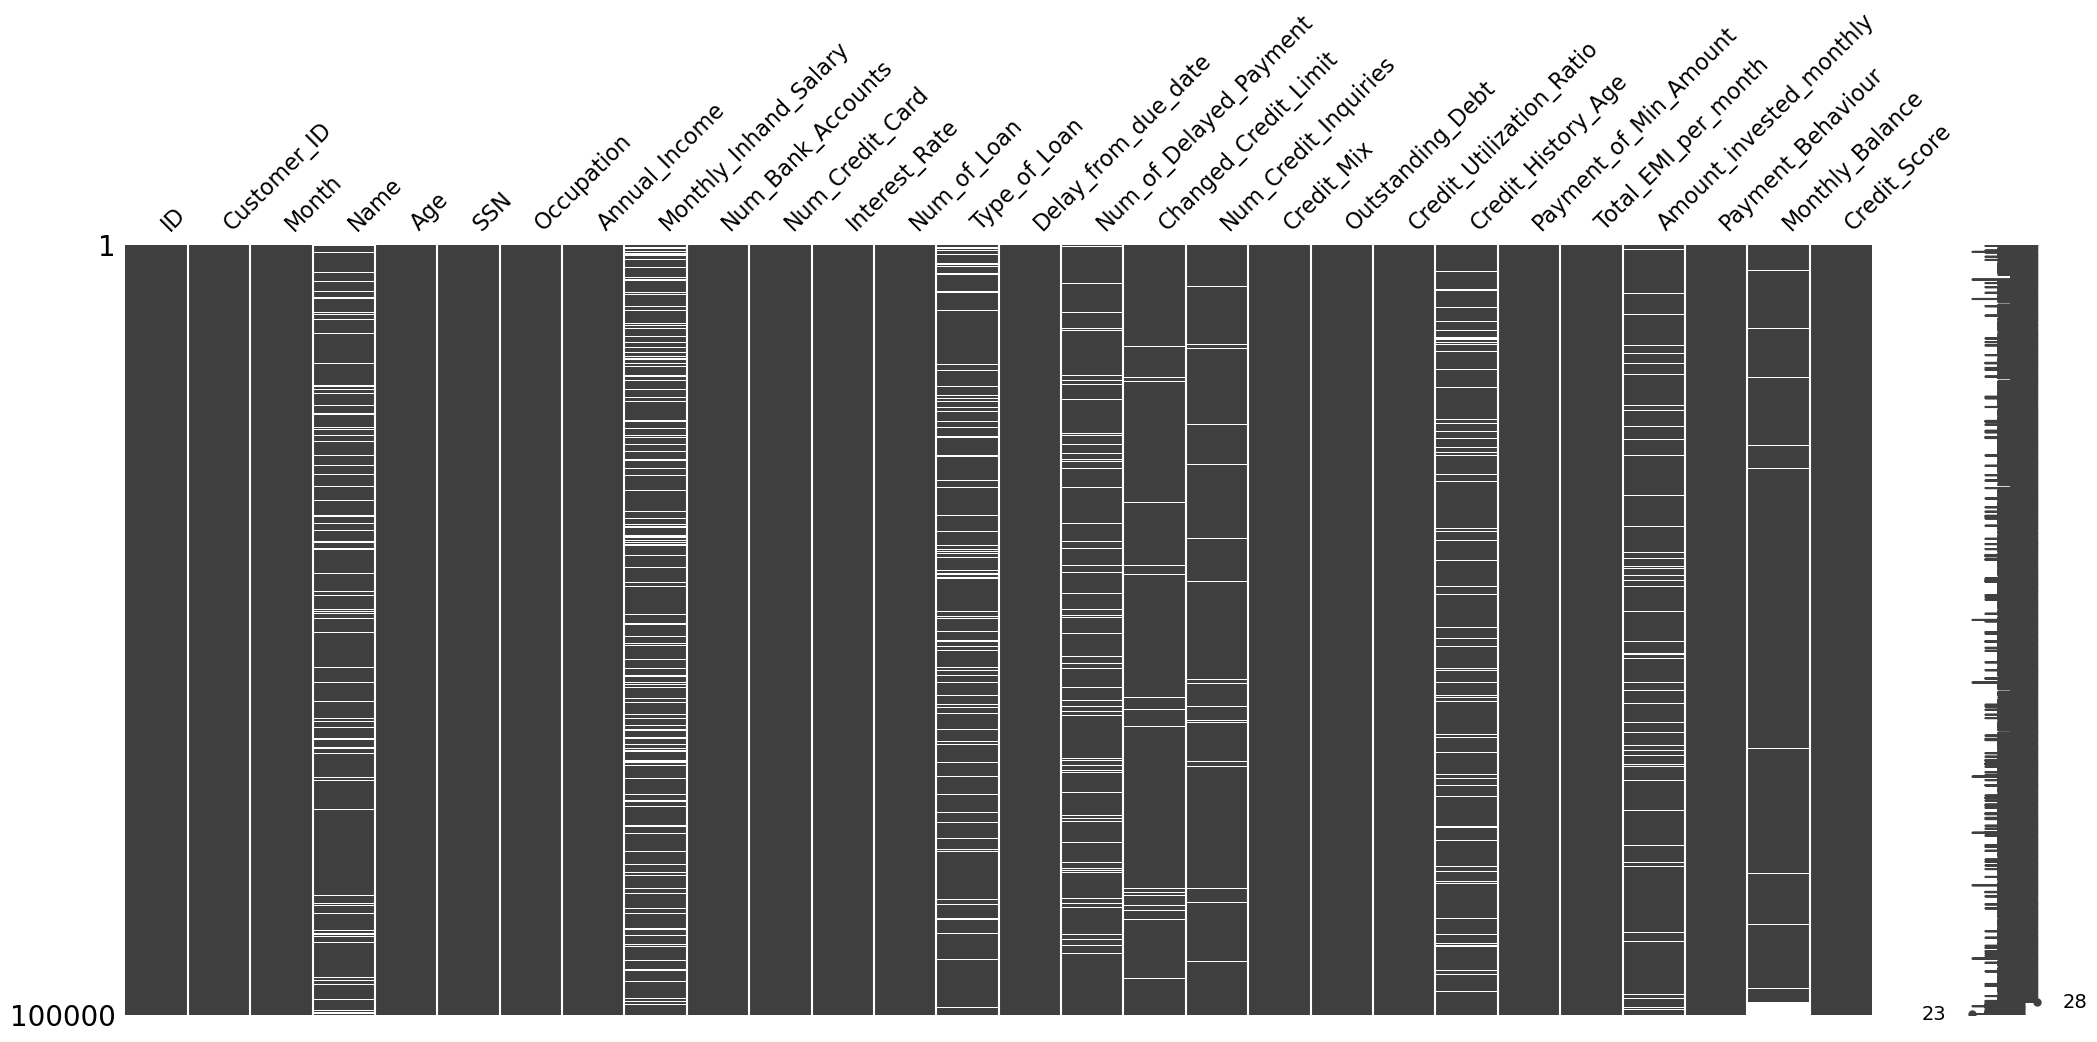

In [1122]:
missingno.matrix(df1)

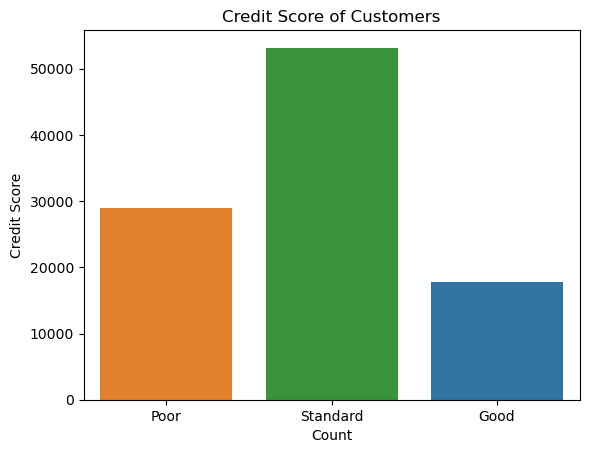

In [1123]:
sns.countplot(x="Credit_Score", data=df1,hue="Credit_Score",order=["Poor","Standard","Good"])
plt.title("Credit Score of Customers")
plt.xlabel("Count")
plt.ylabel("Credit Score")
plt.show()

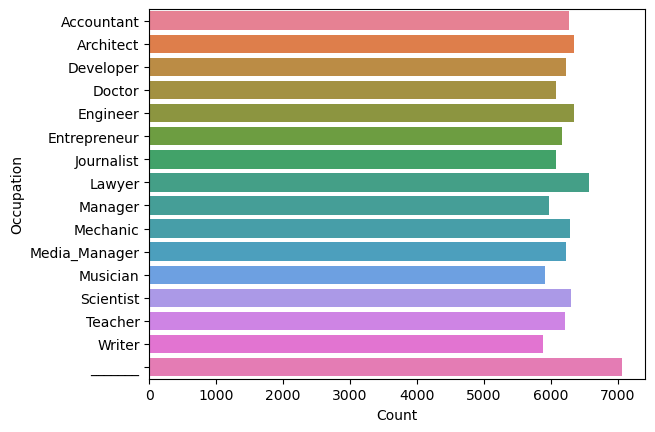

Counter({'_______': 7062, 'Lawyer': 6575, 'Architect': 6355, 'Engineer': 6350, 'Scientist': 6299, 'Mechanic': 6291, 'Accountant': 6271, 'Developer': 6235, 'Media_Manager': 6232, 'Teacher': 6215, 'Entrepreneur': 6174, 'Doctor': 6087, 'Journalist': 6085, 'Manager': 5973, 'Musician': 5911, 'Writer': 5885})


In [1124]:
sns.countplot(y="Occupation", data=df1, hue="Occupation")
plt.xlabel("Count")
plt.ylabel("Occupation")
plt.show()
print(Counter(df1["Occupation"]))

<Axes: xlabel='count', ylabel='Occupation'>

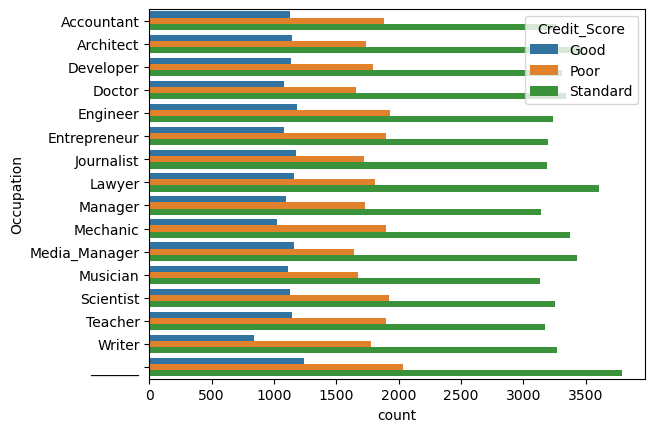

In [1125]:
sns.countplot(y="Occupation", data=df1, hue="Credit_Score")

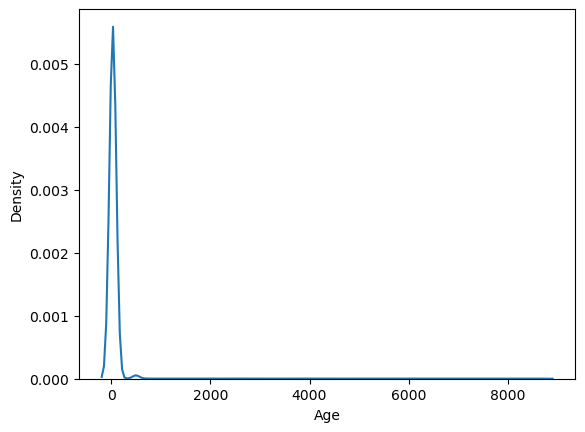

Age distribution skew: 9.236855216127887


In [1126]:
sns.kdeplot(data=df1, x="Age")
plt.show()
print(f'Age distribution skew: {df1["Age"].skew()}')

In [1127]:
print(max(df1["Age"]))
print(np.mean(df1["Age"]))
print(np.median(df1["Age"]))



8698.0
119.5097
34.0


<Axes: >

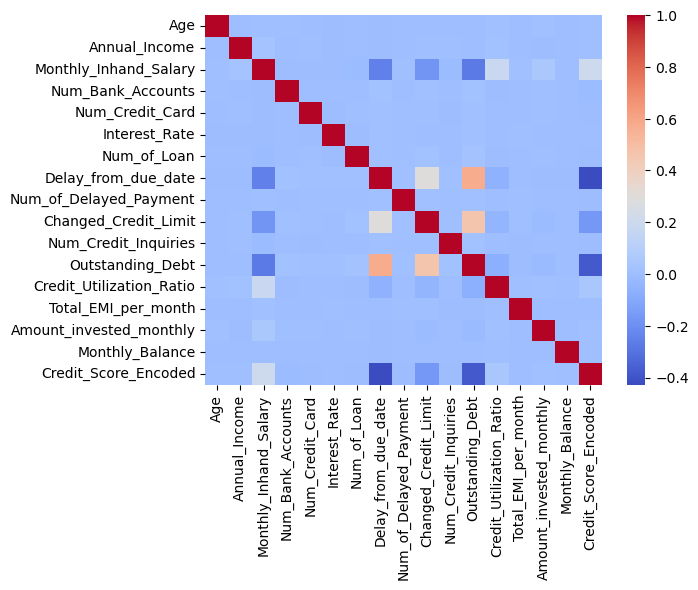

In [1128]:
scoreDict = {"Poor":0,"Standard":1,"Good":2}
df1["Credit_Score_Encoded"] = df1["Credit_Score"].map(scoreDict).astype(int)
dftemp = df1.select_dtypes(include='number') 
dftemp.dropna(inplace=True)
correlation_matrix = dftemp.corr()
sns.heatmap(correlation_matrix,cmap="coolwarm")


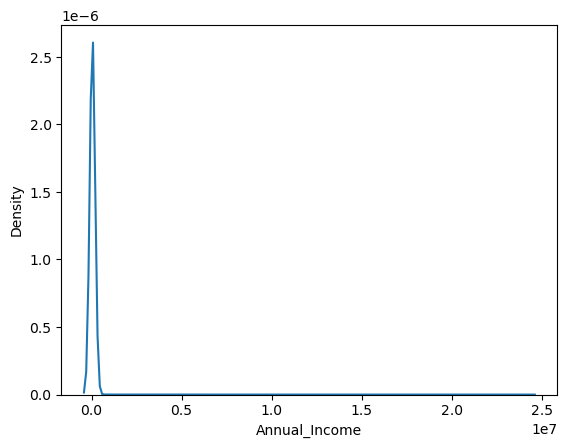

In [1129]:
sns.kdeplot(data=df1, x="Annual_Income")
plt.show()

<Axes: xlabel='Annual_Income', ylabel='Density'>

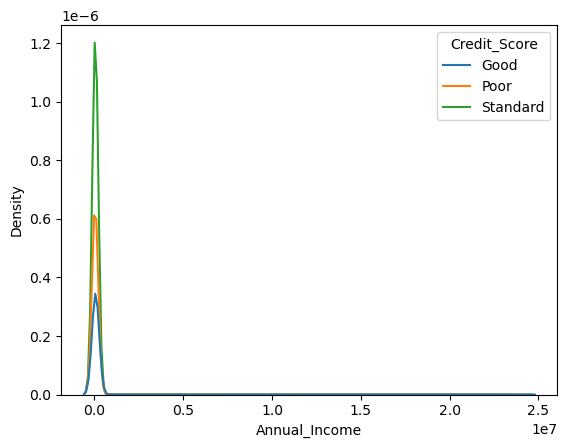

In [1130]:
sns.kdeplot(data=df1, x="Annual_Income",hue="Credit_Score")


In [1131]:
print(max(df1["Annual_Income"]))
print(np.mean(df1["Annual_Income"]))
print(np.median(df1["Annual_Income"]))

24198062.0
176415.70129814997
37578.61


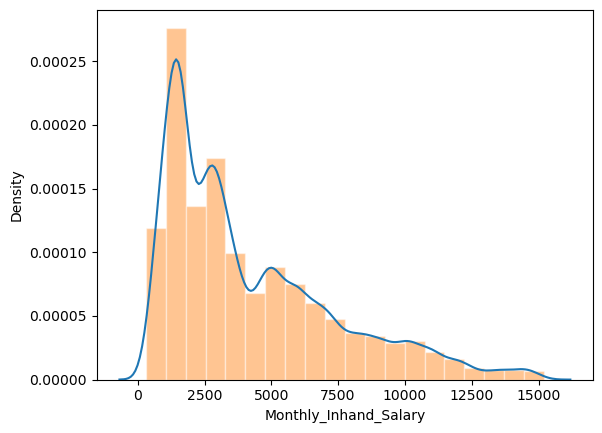

In [1132]:
sns.kdeplot(data=df1, x="Monthly_Inhand_Salary")
plt.hist(df1["Monthly_Inhand_Salary"], density=True, bins=20, alpha=0.45,ec='w')
plt.show()

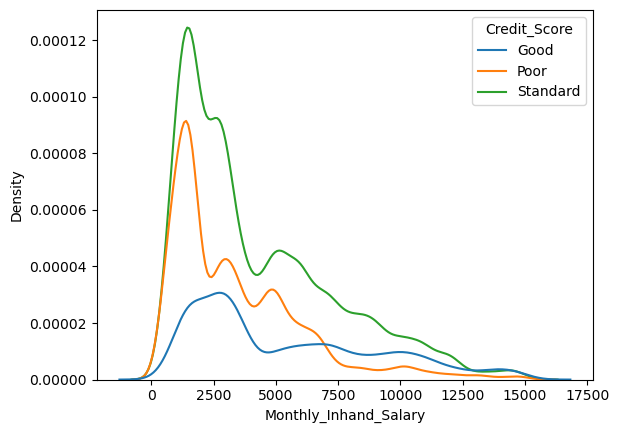

In [1133]:
sns.kdeplot(data=df1, x="Monthly_Inhand_Salary",hue="Credit_Score")
plt.show()

In [1134]:
print(max(df1["Monthly_Inhand_Salary"]))
print(np.mean(df1["Monthly_Inhand_Salary"]))
print(np.median(df1["Monthly_Inhand_Salary"]))

15204.633333333331
4194.170849600523
nan


<Axes: >

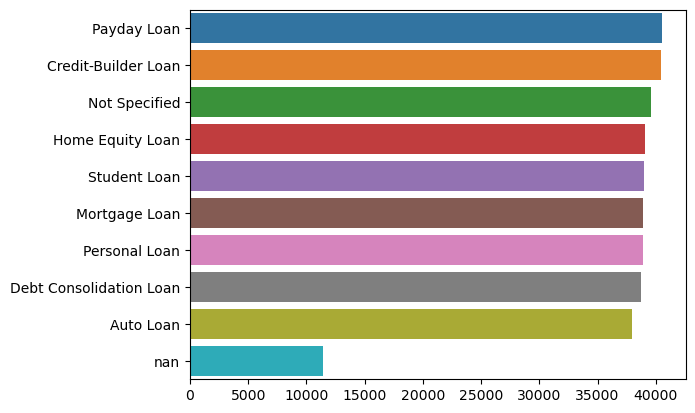

In [1135]:

loanDict = {}
for loan_type in df1["Type_of_Loan"]:
    loans = str(loan_type).split(",")
    for loan in loans:
        loan = loan.strip(' ')
        if "and" in loan:
            loan = loan.split("and ")[1]
        
        if loan in loanDict:
            loanDict[loan] += 1
        else:
            loanDict[loan] = 1
            
loanDict = dict(sorted(loanDict.items(), key=lambda item: item[1],reverse=True))
sns.barplot(x=list(loanDict.values()),y=list(loanDict.keys()),hue=list(loanDict.keys()))

<Axes: xlabel='Credit_Mix', ylabel='count'>

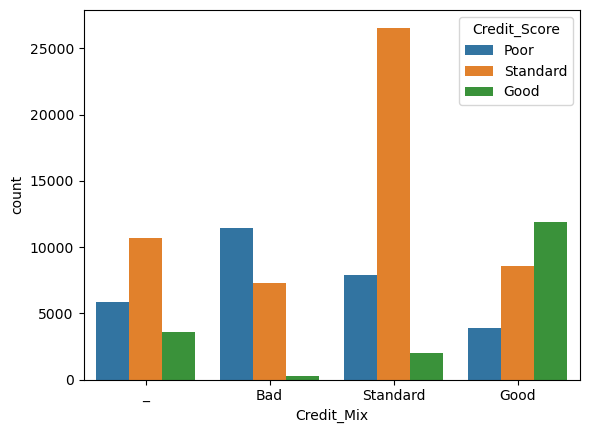

In [1136]:
sns.countplot(x="Credit_Mix",data=df1,hue="Credit_Score",order=["_","Bad","Standard","Good"],hue_order=["Poor","Standard","Good"])

<Axes: xlabel='Changed_Credit_Limit', ylabel='Density'>

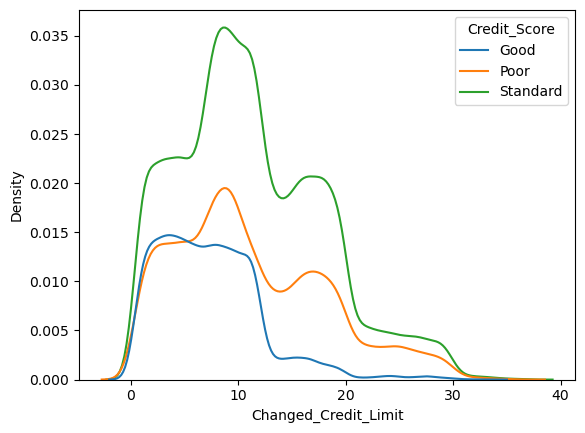

In [1137]:
sns.kdeplot(x="Changed_Credit_Limit",data=df1,hue="Credit_Score")

<Axes: xlabel='Num_of_Delayed_Payment', ylabel='Density'>

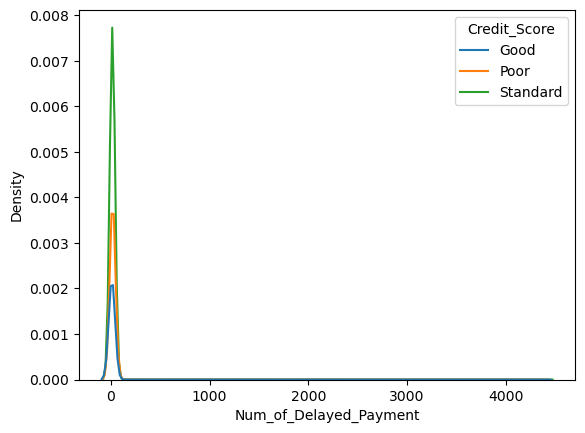

In [1138]:
sns.kdeplot(x="Num_of_Delayed_Payment",data=df1,hue="Credit_Score")

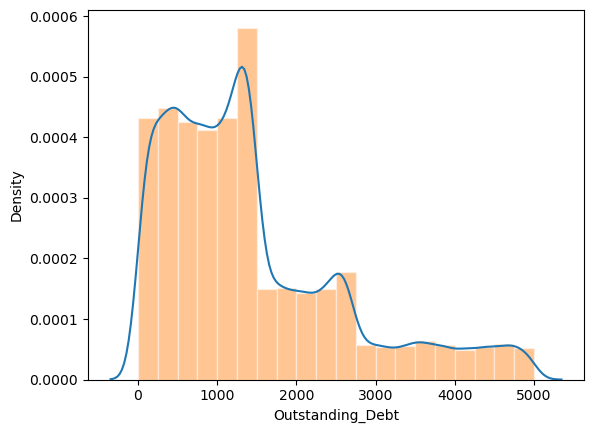

In [1139]:
sns.kdeplot(data=df1, x="Outstanding_Debt")
plt.hist(df1["Outstanding_Debt"], density=True, bins=20, alpha=0.45,ec='w')
plt.show()

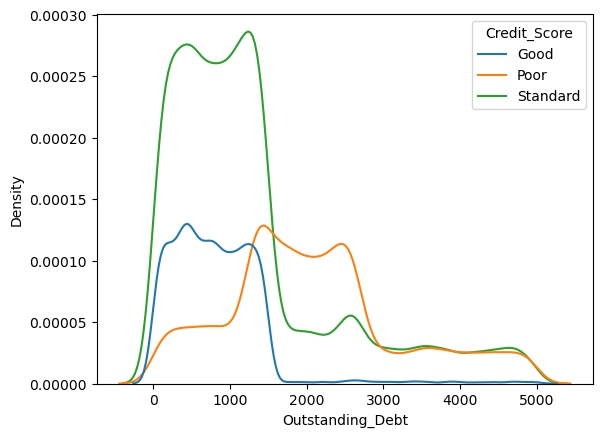

In [1140]:
sns.kdeplot(data=df1, x="Outstanding_Debt",hue="Credit_Score")
plt.show()

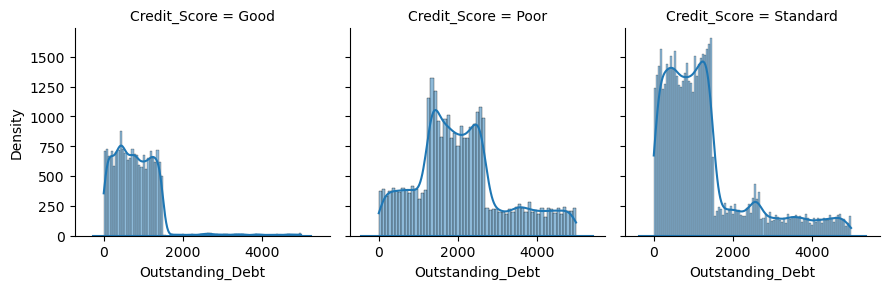

In [1141]:
grid = sns.FacetGrid(df1, col = 'Credit_Score')
grid.map(sns.kdeplot, 'Outstanding_Debt')
grid.map(sns.histplot,'Outstanding_Debt',kde=True)

In [1142]:
print(max(df1["Outstanding_Debt"]))
print(np.mean(df1["Outstanding_Debt"]))
print(np.median(df1["Outstanding_Debt"]))

4998.07
1426.220376
1166.155


Data Cleaning: dealing with null/incorrect values

In [1143]:
df1.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              2868
Credit_Score                    0
Credit_Score_Encoded            0
dtype: int64

In [1144]:
creditmixDict = {"_":0,"Bad":-1,"Standard":1,"Good":2}
df1["Credit_Mix"] = df1["Credit_Mix"].map(creditmixDict).astype(int)

In [1145]:
allPositiveColumns = ["Monthly_Balance","Amount_invested_monthly","Changed_Credit_Limit","Interest_Rate","Num_of_Delayed_Payment",'Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Num_of_Loan','Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries','Outstanding_Debt', 'Total_EMI_per_month']
for column in allPositiveColumns:
    df1 = df1[(df1[column] >= 0) | (df1[column].isnull())]

# for column in "Occupation","Type_of_Loan","Credit_Mix","Payment_of_Min_Amount","Payment_Behaviour","Credit_Score":
    # df1 = df1[(df1[column] != "_") | (df1[column].isnull())]
df1.shape

(99388, 29)

In [1146]:
def removeOutliers(df, columnName):
    if df[columnName].dtype != "float64" and df[columnName].dtype != "int64":
        return df
    q1 = np.percentile(df[columnName].dropna(), 25)
    q3 = np.percentile(df[columnName].dropna(), 75)
    if np.isnan(q1) or np.isnan(q3):
        return df
    iqr = q3 - q1
    original_shape = df.shape[0]
    df = df[(df[columnName] >= q1 - 1.5 * iqr) & (df[columnName] <= q3 + 1.5 * iqr) | df[columnName].isnull()]
    outliers = original_shape - df.shape[0]
    # print(columnName)
    # print(f'Lower quartile: {q1}')
    # print(f'Upper quartile: {q3}')
    # print(f'IQR: {iqr}')
    # print(f'Number of outliers: {outliers}')
    return df



In [1147]:
df1.isnull().sum().sum()

63358

In [1148]:
for column in df1.select_dtypes(include='number').columns:
    df1 = removeOutliers(df1,column)

In [1149]:
poor_mean_monthly_income = df1[df1["Credit_Score"] == "Poor"]["Monthly_Inhand_Salary"].mean()
standard_mean_monthly_income = df1[df1["Credit_Score"] == "Standard"]["Monthly_Inhand_Salary"].mean()
good_mean_monthly_income = df1[df1["Credit_Score"] == "Good"]["Monthly_Inhand_Salary"].mean()
mean_monthly_income = df1["Monthly_Inhand_Salary"].mean()

In [1150]:
df1.isnull().sum().sum()

35624

In [1151]:
df1.loc[(df1["Monthly_Inhand_Salary"].isnull()) & (df1["Credit_Score"] == "Poor"), "Monthly_Inhand_Salary"] = df1.loc[(df1["Monthly_Inhand_Salary"].isnull()) & (df1["Credit_Score"] == "Poor"), "Monthly_Inhand_Salary"].fillna(poor_median_monthly_income)
df1.loc[(df1["Monthly_Inhand_Salary"].isnull()) & (df1["Credit_Score"] == "Standard"), "Monthly_Inhand_Salary"] = df1.loc[(df1["Monthly_Inhand_Salary"].isnull()) & (df1["Credit_Score"] == "Standard"), "Monthly_Inhand_Salary"].fillna(standard_mean_monthly_income)
df1.loc[(df1["Monthly_Inhand_Salary"].isnull()) & (df1["Credit_Score"] == "Good"), "Monthly_Inhand_Salary"] = df1.loc[(df1["Monthly_Inhand_Salary"].isnull()) & (df1["Credit_Score"] == "Good"), "Monthly_Inhand_Salary"].fillna(good_mean_monthly_income)

<Axes: >

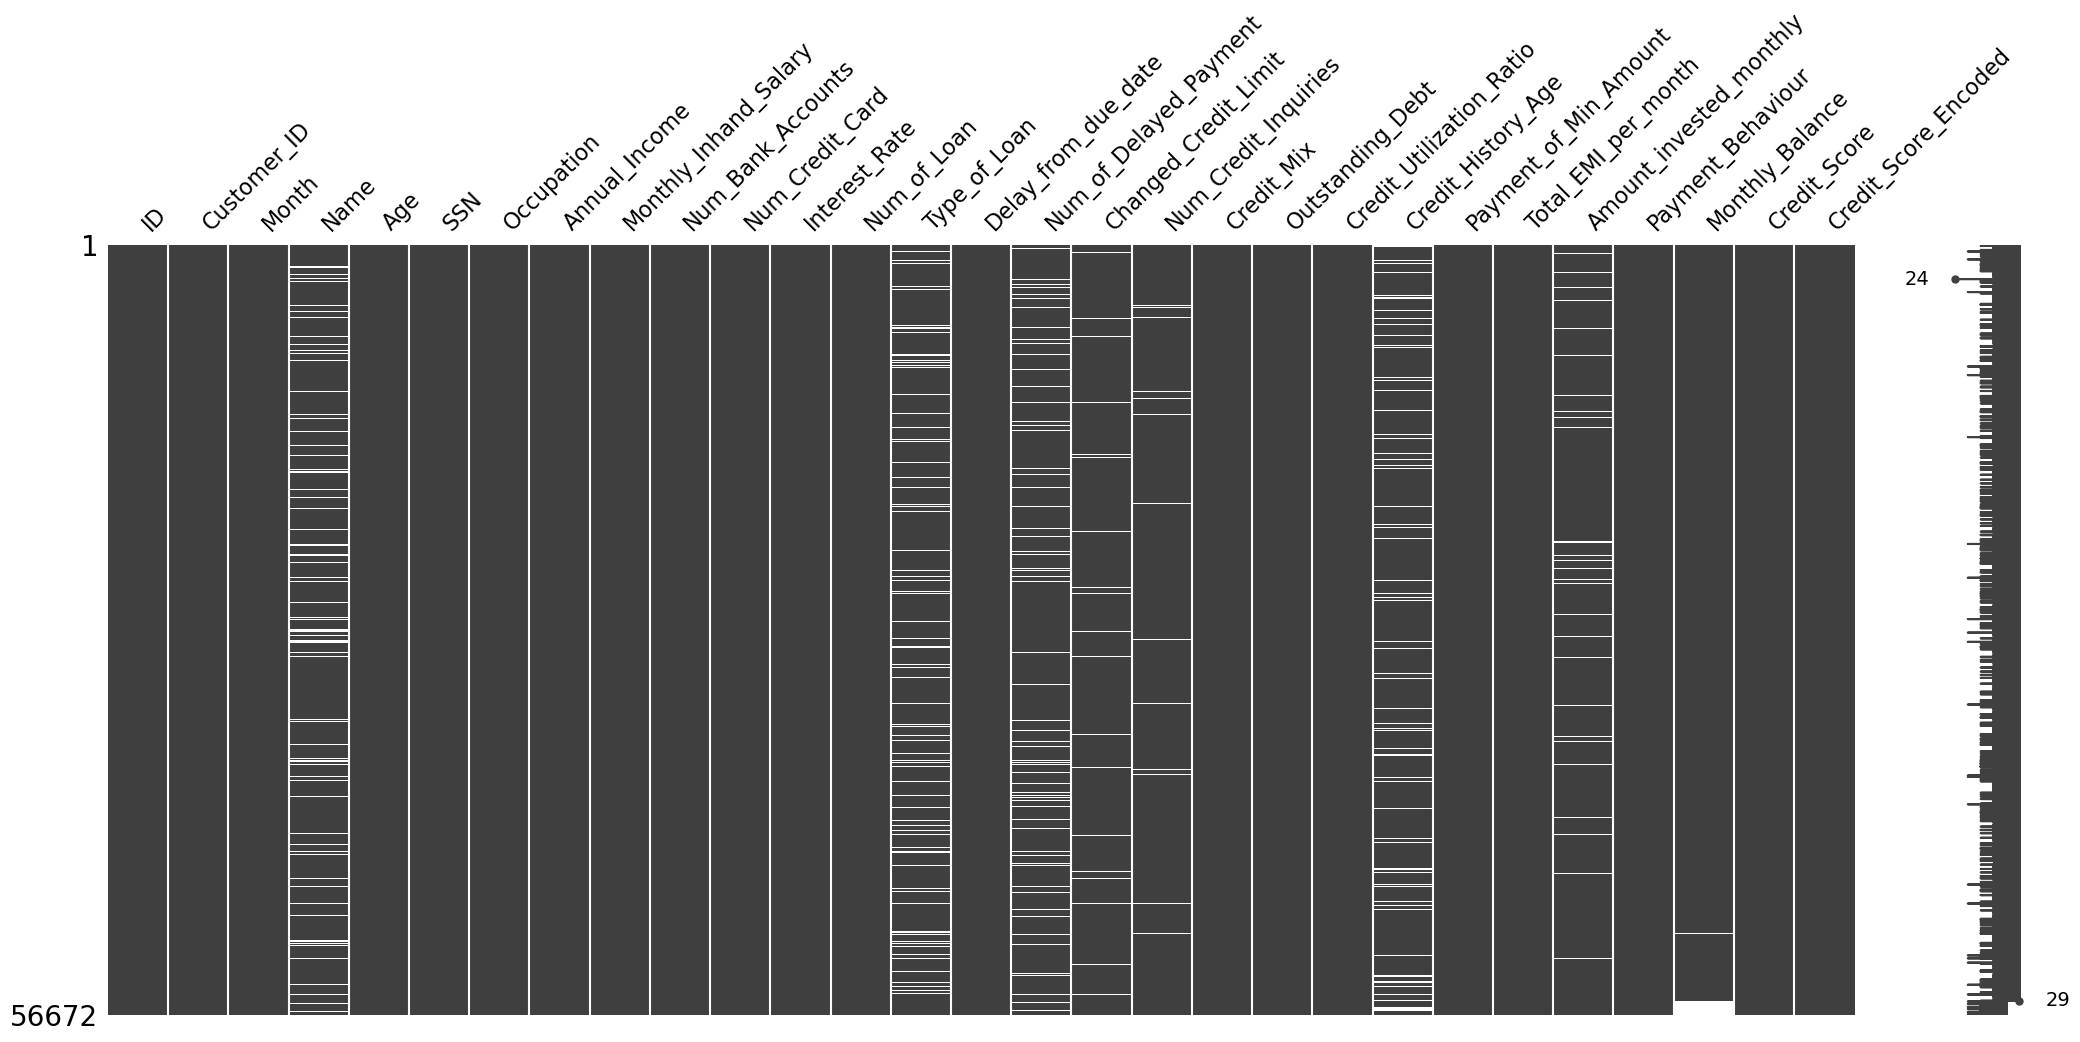

In [1152]:
missingno.matrix(df1)

<Axes: ylabel='None'>

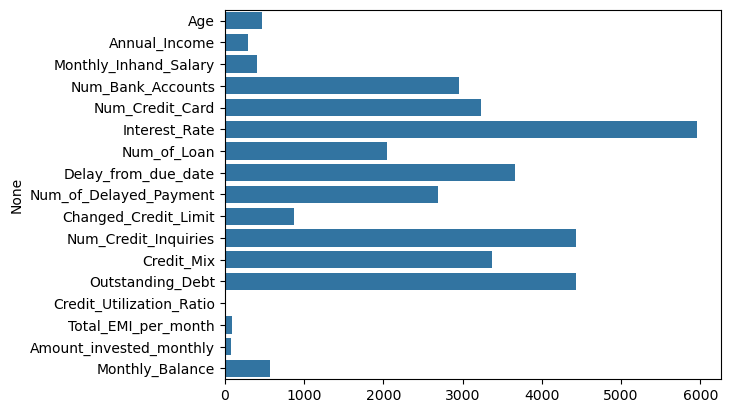

In [1153]:
feature_model = SelectKBest(f_classif, k=2)
dfcleaned = df1.dropna()
X = dfcleaned.select_dtypes(include="number").drop(columns=["Credit_Score_Encoded"])
y = dfcleaned["Credit_Score_Encoded"]
k_scores = feature_model.fit(X, y)
sns.barplot(y=X.columns, x=k_scores.scores_)

In [1154]:
df = pd.DataFrame(data = {"Columns":X.columns, "Score":k_scores.scores_})
df.sort_values("Score",ascending=False)

,Columns,Score
5,Interest_Rate,5960.898013
10,Num_Credit_Inquiries,4436.745417
12,Outstanding_Debt,4434.292570
7,Delay_from_due_date,3657.872423
11,Credit_Mix,3376.911553
4,Num_Credit_Card,3227.830315
3,Num_Bank_Accounts,2949.518497
8,Num_of_Delayed_Payment,2696.229549
6,Num_of_Loan,2044.619953
9,Changed_Credit_Limit,871.638331


<Axes: >

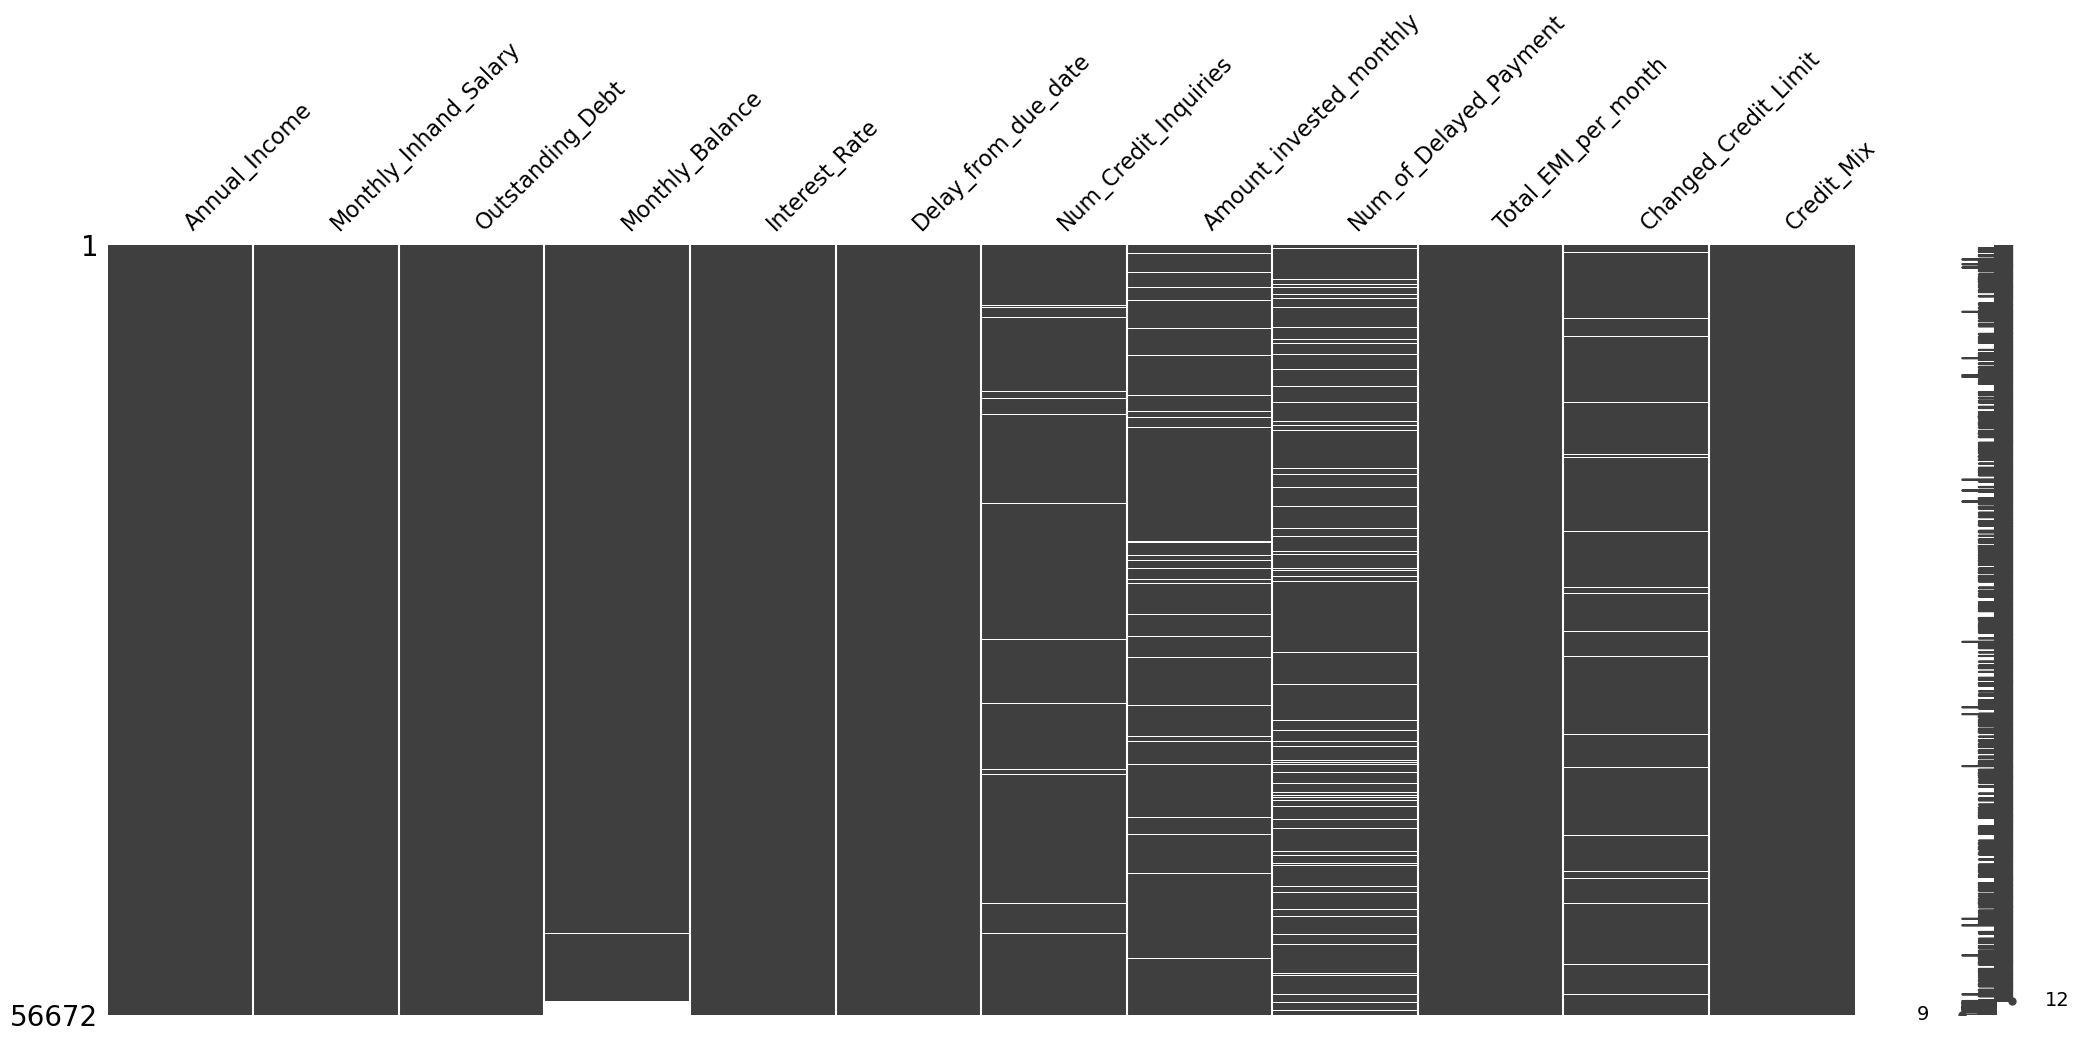

In [1155]:
missingno.matrix(df1[["Annual_Income","Monthly_Inhand_Salary","Outstanding_Debt","Monthly_Balance","Interest_Rate","Delay_from_due_date","Num_Credit_Inquiries","Amount_invested_monthly","Num_of_Delayed_Payment","Total_EMI_per_month","Changed_Credit_Limit","Credit_Mix"]])

In [1156]:
mean_monthly_balance = df1["Monthly_Balance"].mean()
df1.loc[df1["Monthly_Balance"].isnull(),"Monthly_Balance"] = df1.loc[df1["Monthly_Balance"].isnull(),"Monthly_Balance"].fillna(mean_monthly_balance)

In [1157]:
poor_inquiries = df1.loc[df1["Credit_Score"]=="Poor","Num_Credit_Inquiries"].median()
standard_inquiries = df1.loc[df1["Credit_Score"]=="Standard","Num_Credit_Inquiries"].median()
good_inquiries = df1.loc[df1["Credit_Score"]=="Good","Num_Credit_Inquiries"].median()

df1.loc[df1["Credit_Score"] == "Poor", "Num_Credit_Inquiries"] = df1.loc[df1["Credit_Score"] == "Poor", "Num_Credit_Inquiries"].fillna(poor_inquiries)
df1.loc[df1["Credit_Score"] == "Standard", "Num_Credit_Inquiries"] = df1.loc[df1["Credit_Score"] == "Standard", "Num_Credit_Inquiries"].fillna(standard_inquiries)
df1.loc[df1["Credit_Score"] == "Good", "Num_Credit_Inquiries"] = df1.loc[df1["Credit_Score"] == "Good", "Num_Credit_Inquiries"].fillna(good_inquiries)


In [1158]:
poor_limit = df1.loc[df1["Credit_Score"]=="Poor","Changed_Credit_Limit"].mean()
standard_limit = df1.loc[df1["Credit_Score"]=="Standard","Changed_Credit_Limit"].mean()
good_limit = df1.loc[df1["Credit_Score"]=="Good","Changed_Credit_Limit"].mean()

df1.loc[df1["Credit_Score"] == "Poor", "Changed_Credit_Limit"] = df1.loc[df1["Credit_Score"] == "Poor", "Changed_Credit_Limit"].fillna(poor_limit)
df1.loc[df1["Credit_Score"] == "Standard", "Changed_Credit_Limit"] = df1.loc[df1["Credit_Score"] == "Standard", "Changed_Credit_Limit"].fillna(standard_limit)
df1.loc[df1["Credit_Score"] == "Good", "Changed_Credit_Limit"] = df1.loc[df1["Credit_Score"] == "Good", "Changed_Credit_Limit"].fillna(good_limit)

In [1159]:
poor_amount = df1.loc[df1["Credit_Score"]=="Poor","Amount_invested_monthly"].mean()
standard_amount = df1.loc[df1["Credit_Score"]=="Standard","Amount_invested_monthly"].mean()
good_amount = df1.loc[df1["Credit_Score"]=="Good","Amount_invested_monthly"].mean()

df1.loc[df1["Credit_Score"] == "Poor", "Amount_invested_monthly"] = df1.loc[df1["Credit_Score"] == "Poor", "Amount_invested_monthly"].fillna(poor_amount)
df1.loc[df1["Credit_Score"] == "Standard", "Amount_invested_monthly"] = df1.loc[df1["Credit_Score"] == "Standard", "Amount_invested_monthly"].fillna(standard_amount)
df1.loc[df1["Credit_Score"] == "Good", "Amount_invested_monthly"] = df1.loc[df1["Credit_Score"] == "Good", "Amount_invested_monthly"].fillna(good_amount)
print(poor_amount)
print(standard_amount)
print(good_amount)

136.33236478393238
149.66882088005076
156.1970027149266


In [1160]:
poor_delayed = df1.loc[df1["Credit_Score"]=="Poor","Num_of_Delayed_Payment"].median()
standard_delayed = df1.loc[df1["Credit_Score"]=="Standard","Num_of_Delayed_Payment"].median()
good_delayed = df1.loc[df1["Credit_Score"]=="Good","Num_of_Delayed_Payment"].median()

df1.loc[df1["Credit_Score"] == "Poor", "Num_of_Delayed_Payment"] = df1.loc[df1["Credit_Score"] == "Poor", "Num_of_Delayed_Payment"].fillna(poor_delayed)
df1.loc[df1["Credit_Score"] == "Standard", "Num_of_Delayed_Payment"] = df1.loc[df1["Credit_Score"] == "Standard", "Num_of_Delayed_Payment"].fillna(standard_delayed)
df1.loc[df1["Credit_Score"] == "Good", "Num_of_Delayed_Payment"] = df1.loc[df1["Credit_Score"] == "Good", "Num_of_Delayed_Payment"].fillna(good_delayed)
print(poor_delayed)
print(standard_delayed)
print(good_delayed)

16.0
13.0
9.0


In [1161]:

# Used for training and testing the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

# Used for evaluating model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [1162]:
df1.dropna(inplace=True)
X = df1[["Annual_Income","Monthly_Inhand_Salary","Outstanding_Debt","Monthly_Balance","Interest_Rate","Delay_from_due_date","Num_Credit_Inquiries","Amount_invested_monthly","Num_of_Delayed_Payment","Total_EMI_per_month","Changed_Credit_Limit","Credit_Mix"]]
cols = X.select_dtypes(include='number').columns
X = X[cols]
y = df1['Credit_Score']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [1163]:
# Helper function to generate confusion matrix
def CM(y_test, y_pred, col_names, title='', cmap=plt.cm.Blues):
    CM = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(CM, annot=True, fmt=".0f", cmap=cmap)

    tick_marks = np.arange(len(col_names))
    plt.xticks(tick_marks + 0.5, col_names)
    plt.yticks(tick_marks + 0.5, col_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix ' + title)
    plt.show()

Accuracy: 0.8084078279777724
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.74      0.71      1241
           1       0.82      0.80      0.81      2555
           2       0.84      0.83      0.83      4482

    accuracy                           0.81      8278
   macro avg       0.78      0.79      0.79      8278
weighted avg       0.81      0.81      0.81      8278

Confusion Matrix:
[[ 919   13  309]
 [  86 2049  420]
 [ 335  423 3724]]


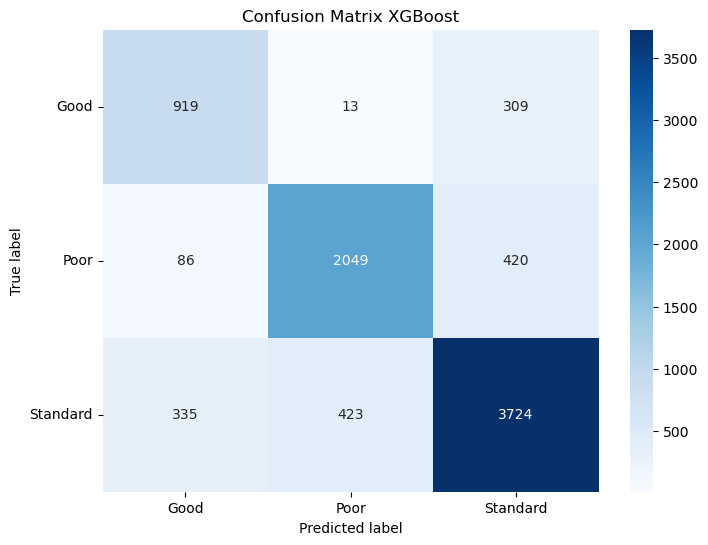

In [1164]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
CM(y_test, y_pred, col_names=['Good', 'Poor', 'Standard'], title='XGBoost', cmap='Blues')

In [1165]:
xgb_model.save_model("model.json")

<Axes: ylabel='None'>

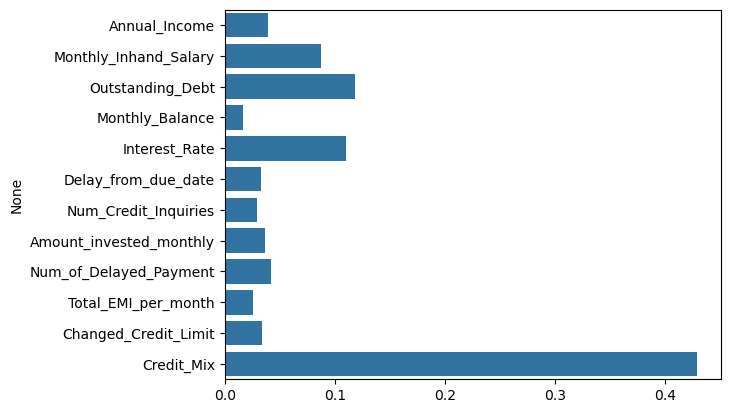

In [1166]:
sns.barplot(x=xgb_model.feature_importances_, y=cols)